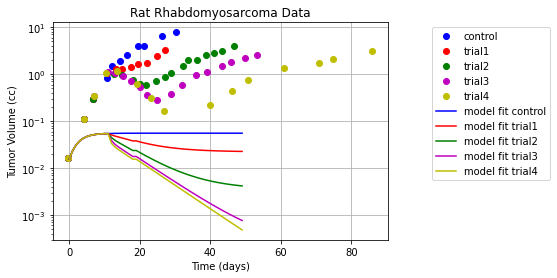

In [2]:
#importing necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import pandas as pd

#loading in rat data
control = np.genfromtxt("control.csv",delimiter=",", dtype=float)
x1 = np.genfromtxt("data1.csv",delimiter=",",dtype=float)
x2 = np.genfromtxt("data2.csv",delimiter=",",dtype=float)
x3 = np.genfromtxt("data3.csv",delimiter=",",dtype=float)
x4 = np.genfromtxt("data4.csv",delimiter=",",dtype=float)

##################################################################################################

#define ODE system - BEFORE IRRADIATION
def tumorbefore(x,t,D,alpha,Td0,theta,Tcl):
    vT,vND,lam = x
    
    #constants
    ncl = 0.693/Tcl  
    Tstar = 1 #day
    Tm = 10 #days
    ab = 10 #Gy
    Tr = 11
    Trad = 8
    Td = 0.693/lam
    
    chi = alpha*D*(1+(D/ab))
    p = 1-(Tstar/3*Tm)*chi
    g = chi/(3*Tm)
    
    #SOLVING
    dVT= lam*vT
    dVND = 0
    dlam= -theta*Td0*lam
    
    return [dVT,dVND,dlam]

#define ODE system DURING IRRADIATION
def tumorduring(x,t,D,alpha,Td0,theta,Tcl):
    vT,vND,lam = x
    
    #constants
    ncl = 0.693/Tcl  
    Tstar = 1 #day
    Tm = 10 #days
    ab = 10 #Gy
    Tr = 11
    Trad = 8
    Td = 0.693/lam
    
    chi = alpha*D*(1+(D/ab))
    p = 1-(Tstar/3*Tm)*chi
    g = chi/(3*Tm)
    
    #SOLVING
    dVT=(lam*p*vT)-(g*vT)
    dVND = (g*vT)-(ncl*vND)
    dlam = -1*theta*Td0*lam
        
    return [dVT,dVND,dlam]

#define ODE system AFTER IRRADIATION
def tumorafter(x,t,D,alpha,Td0,theta,Tcl):
    vT,vND,lam = x
    
    #constants
    ncl = 0.693/Tcl  
    Tstar = 1 #day
    Tm = 10 #days
    ab = 10 #Gy
    Tr = 11
    Trad = 8
    Td = 0.693/lam
    
    chi = alpha*D*(1+(D/ab))
    p = 1-(Tstar/3*Tm)*chi
    g = chi/(3*Tm)
    
    #SOLVING
    dVT= lam*vT
    dVND = -ncl*vND
    dlam = -theta*Td0*lam
    
    return [dVT,dVND,dlam]

##################################################################################################

#creating time vector
Tr = 11 #day
Trad = 8 #days
timebefore = np.arange(0,Tr,1)
timeduring = np.arange(Tr,Tr+Trad,1)
timeafter = np.arange(Tr+Trad,50,1)
time = np.concatenate([timebefore,timeduring,timeafter])

#rat constant values - optimized values
D = np.array([0,10,20,30,40])
alpha = 0.1523
lam0 = 0.693/1.35
theta = 0.7941
Tcl = 5.98

###################################################################################################

#initial conditions - BEFORE IRRADIATION
inicbefore = np.array([0.0157,0,lam0])

#fitting model
ODEbeforecontrol = odeint(tumorbefore,inicbefore,timebefore,args=(D[0],alpha,lam0,theta,Tcl))
ODEbeforex1 = odeint(tumorbefore,inicbefore,timebefore,args=(D[1],alpha,lam0,theta,Tcl))
ODEbeforex2 = odeint(tumorbefore,inicbefore,timebefore,args=(D[2],alpha,lam0,theta,Tcl))
ODEbeforex3 = odeint(tumorbefore,inicbefore,timebefore,args=(D[3],alpha,lam0,theta,Tcl))
ODEbeforex4 = odeint(tumorbefore,inicbefore,timebefore,args=(D[4],alpha,lam0,theta,Tcl))

####################################################################################################

#initial conditions - DURING IRRADIATION
inicduringcontrol = np.asarray(ODEbeforecontrol[-1:,:])
inicduringcontrol = inicduringcontrol.reshape(3,)

inicduringx1 = np.asarray(ODEbeforex1[-1:,:])
inicduringx1 = inicduringx1.reshape(3,)

inicduringx2 = np.asarray(ODEbeforex2[-1:,:])
inicduringx2 = inicduringx2.reshape(3,)

inicduringx3 = np.asarray(ODEbeforex3[-1:,:])
inicduringx3 = inicduringx3.reshape(3,)

inicduringx4 = np.asarray(ODEbeforex4[-1:,:])
inicduringx4 = inicduringx4.reshape(3,)

#fitting model
ODEduringcontrol = odeint(tumorduring,inicduringcontrol,timeduring,args=(D[0],alpha,lam0,theta,Tcl))
ODEduringx1 = odeint(tumorduring,inicduringx1,timeduring,args=(D[1],alpha,lam0,theta,Tcl))
ODEduringx2 = odeint(tumorduring,inicduringx2,timeduring,args=(D[2],alpha,lam0,theta,Tcl))
ODEduringx3 = odeint(tumorduring,inicduringx3,timeduring,args=(D[3],alpha,lam0,theta,Tcl))
ODEduringx4 = odeint(tumorduring,inicduringx4,timeduring,args=(D[4],alpha,lam0,theta,Tcl))

#######################################################################################################

#initial conditions - AFTER IRRADIATION
inicaftercontrol = np.asarray(ODEduringcontrol[-1:,:])
inicaftercontrol = inicaftercontrol.reshape(3,)

inicafterx1 = np.asarray(ODEduringx1[-1:,:])
inicafterx1 = inicafterx1.reshape(3,)

inicafterx2 = np.asarray(ODEduringx2[-1:,:])
inicafterx2 = inicafterx2.reshape(3,)

inicafterx3 = np.asarray(ODEduringx3[-1:,:])
inicafterx3 = inicafterx3.reshape(3,)

inicafterx4 = np.asarray(ODEduringx4[-1:,:])
inicafterx4 = inicafterx4.reshape(3,)

#fitting model
ODEaftercontrol = odeint(tumorafter,inicaftercontrol,timeafter,args=(D[0],alpha,lam0,theta,Tcl))
ODEafterx1 = odeint(tumorafter,inicafterx1,timeafter,args=(D[1],alpha,lam0,theta,Tcl))
ODEafterx2 = odeint(tumorafter,inicafterx2,timeafter,args=(D[2],alpha,lam0,theta,Tcl))
ODEafterx3 = odeint(tumorafter,inicafterx3,timeafter,args=(D[3],alpha,lam0,theta,Tcl))
ODEafterx4 = odeint(tumorafter,inicafterx4,timeafter,args=(D[4],alpha,lam0,theta,Tcl))

######################################################################################################

#combining responses
ODEresponse = np.concatenate([ODEbeforecontrol,ODEduringcontrol,ODEaftercontrol])
ODE1response = np.concatenate([ODEbeforex1,ODEduringx1,ODEafterx1])
ODE2response = np.concatenate([ODEbeforex2,ODEduringx2,ODEafterx2])
ODE3response = np.concatenate([ODEbeforex3,ODEduringx3,ODEafterx3])
ODE4response = np.concatenate([ODEbeforex4,ODEduringx4,ODEafterx4])
    
#plotting everything
plt.figure()
plt.yscale('log')
plt.plot(control[:,0],control[:,1],'bo',label="control")
plt.plot(x1[:,0],x1[:,1],'ro',label="trial1")
plt.plot(x2[:,0],x2[:,1],'go',label="trial2")
plt.plot(x3[:,0],x3[:,1],'mo',label="trial3")
plt.plot(x4[:,0],x4[:,1],'yo',label="trial4")

#adding volume of actively dividing and dead cells
plt.plot(time,ODEresponse[:,0]+ODEresponse[:,1],'b',label='model fit control')
plt.plot(time,ODE1response[:,0]+ODE1response[:,1],'r',label='model fit trial1')
plt.plot(time,ODE2response[:,0]+ODE2response[:,1],'g',label='model fit trial2')
plt.plot(time,ODE3response[:,0]+ODE3response[:,1],'m',label='model fit trial3')
plt.plot(time,ODE4response[:,0]+ODE4response[:,1],'y',label='model fit trial4')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.xlabel("Time (days)")
plt.title("Rat Rhabdomyosarcoma Data")
plt.ylabel("Tumor Volume (cc)")
plt.grid()


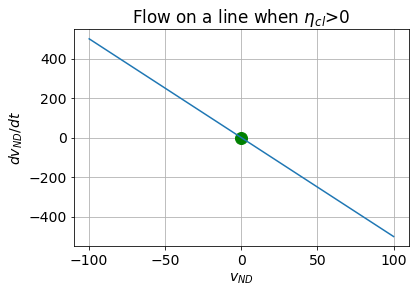

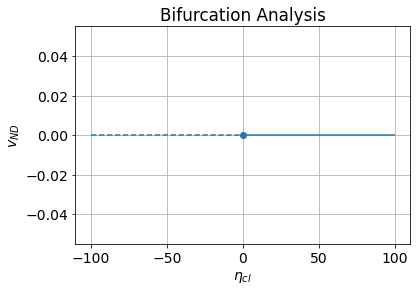

In [4]:
#bifurcation analysis - ncl
#choosing to analyze after radiation treatment is over -> important for measuring relapse or recurrence of cancer
#dvnd/dt = -ncl*vND

#defining derivative
def dvndt(ncl,vND):
    dvndt = -ncl*vND
    return dvndt

#solving derivative
y_values = np.linspace(-100,100,100)

dydt_values = []
for m in y_values:
    dydt_values.append(dvndt(5,m)) #using optimized value for ncl
    
# Plot derivative vs y
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("$v_{ND}$")
plt.ylabel("$dv_{ND}/dt$")
plt.title("Flow on a line when $\eta_{cl}$>0")
plt.plot([0],[0], color='green', marker = 'o', linestyle = 'none',markersize=12);
plt.plot(y_values,dydt_values);
plt.grid()

#plot bifurcation chart
plt.figure()
plt.plot(0,0,marker='o')
plt.hlines(y=0,xmin=-100,xmax=0,linestyle='--')
plt.hlines(y=0,xmin=0,xmax=100,linestyle='-')
plt.title("Bifurcation Analysis")
plt.xlabel("$\eta_{cl}$")
plt.ylabel("$v_{ND}$")
plt.grid()

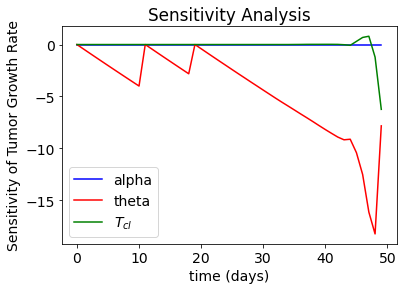

In [5]:
#local parametric analysis - trial 4 situation only!
#changing alpha by 1%
ODEbeforex4 = odeint(tumorbefore,inicbefore,timebefore,args=(D[4],alpha*1.01,lam0,theta,Tcl))
ODEduringx4 = odeint(tumorduring,inicduringx4,timeduring,args=(D[4],alpha*1.01,lam0,theta,Tcl))
ODEafterx4 = odeint(tumorafter,inicafterx4,timeafter,args=(D[4],alpha*1.01,lam0,theta,Tcl))
ODE4_1 = np.concatenate([ODEbeforex4,ODEduringx4,ODEafterx4])

#changing theta by 1%
ODEbeforex4 = odeint(tumorbefore,inicbefore,timebefore,args=(D[4],alpha,lam0,theta*1.01,Tcl))
ODEduringx4 = odeint(tumorduring,inicduringx4,timeduring,args=(D[4],alpha,lam0,theta*1.01,Tcl))
ODEafterx4 = odeint(tumorafter,inicafterx4,timeafter,args=(D[4],alpha,lam0,theta*1.01,Tcl))
ODE4_2 = np.concatenate([ODEbeforex4,ODEduringx4,ODEafterx4])

#changing Tcl by 1%
ODEbeforex4 = odeint(tumorbefore,inicbefore,timebefore,args=(D[4],alpha,lam0,theta,Tcl*1.01))
ODEduringx4 = odeint(tumorduring,inicduringx4,timeduring,args=(D[4],alpha,lam0,theta,Tcl*1.01))
ODEafterx4 = odeint(tumorafter,inicafterx4,timeafter,args=(D[4],alpha,lam0,theta,Tcl*1.01))
ODE4_3 = np.concatenate([ODEbeforex4,ODEduringx4,ODEafterx4])

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time (days)")
plt.ylabel("Sensitivity of Tumor Growth Rate")
plt.title("Sensitivity Analysis")
plt.plot(time, ((ODE4_1[:,2] - ODE4response[:,2])/ODE4response[:,2])/0.01,'b', label = "alpha");
plt.plot(time, ((ODE4_2[:,2] - ODE4response[:,2])/ODE4response[:,2])/0.01,'r', label = "theta");
plt.plot(time,((ODE4_3[:,2] - ODE4response[:,2])/ODE4response[:,2])/0.01,'g', label = "$T_{cl}$");
plt.legend()